# Data Loading
This dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset.
**Feature description**:

**price**

**The 4 Cs of Diamonds:-**

**carat (0.2--5.01)**

**cut (Fair, Good, Very Good, Premium, Ideal)**

**color, from J (worst) to D (best)**

**clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**

**Dimensions**

**x length in mm (0--10.74)**

**y width in mm (0--58.9)**

**z depth in mm (0--31.8)**

**depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)** </br>
The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

**table width of the top of the diamond relative to widest point (43--95)** </br>
A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

In [15]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [16]:
cwd = os.getcwd()
print(cwd)
os.chdir('C:/Users/User/Downloads/Data_AV/DAV_CA1')
# Reading the data
data = pd.read_csv("diamonds.csv", encoding='latin-1')

# Checking the first 5 rows of the data
data.head()

C:\Users\User\Downloads\Data_AV\DAV_CA1


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<b>There are no null values in the dataset</b></br>
<b>The first column is an index ("Unnamed: 0"), so I'm going to remove it later on</b>

In [17]:
# Checking the data types of the columns
data.shape

(53940, 11)

In [18]:
# Checking the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Data Cleaning

In [19]:
# Remove the first column as it is not needed
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [20]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_column = list(s[s].index)
print("Categorical attributes:")
print(object_column)

Categorical attributes:
['cut', 'color', 'clarity']


In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each specified column
columns_to_encode = ['cut', 'color', 'clarity']
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])
    
    # Print the mapping of original string values to encoded integer values
    print(f"Mapping for column '{column}':")
    for i, class_ in enumerate(label_encoder.classes_):
        print(f"'{class_}' --> {i}")

Mapping for column 'cut':
'Fair' --> 0
'Good' --> 1
'Ideal' --> 2
'Premium' --> 3
'Very Good' --> 4
Mapping for column 'color':
'D' --> 0
'E' --> 1
'F' --> 2
'G' --> 3
'H' --> 4
'I' --> 5
'J' --> 6
Mapping for column 'clarity':
'I1' --> 0
'IF' --> 1
'SI1' --> 2
'SI2' --> 3
'VS1' --> 4
'VS2' --> 5
'VVS1' --> 6
'VVS2' --> 7


Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [22]:
# Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

Removed 20 data by deleting the dimensionless diamonds.

In [23]:
# Checking the data types of the columns
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int32  
 2   color    53920 non-null  int32  
 3   clarity  53920 non-null  int32  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.9 MB


# Multivariate Analysis

In [41]:
predictor_variable = ['price']
response_variable = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

for predictor_var in predictor_variable:
    for response_var in response_variable:
        corr_coef, p_value = pearsonr(data[predictor_var], data[response_var])
        print(f"Pearson correlation coefficient between '{predictor_var}' and '{response_var}': {corr_coef:.2f}")

Pearson correlation coefficient between 'price' and 'carat': 0.92
Pearson correlation coefficient between 'price' and 'cut': 0.04
Pearson correlation coefficient between 'price' and 'color': 0.17
Pearson correlation coefficient between 'price' and 'clarity': -0.07
Pearson correlation coefficient between 'price' and 'depth': -0.01
Pearson correlation coefficient between 'price' and 'table': 0.13
Pearson correlation coefficient between 'price' and 'x': 0.89
Pearson correlation coefficient between 'price' and 'y': 0.87
Pearson correlation coefficient between 'price' and 'z': 0.87


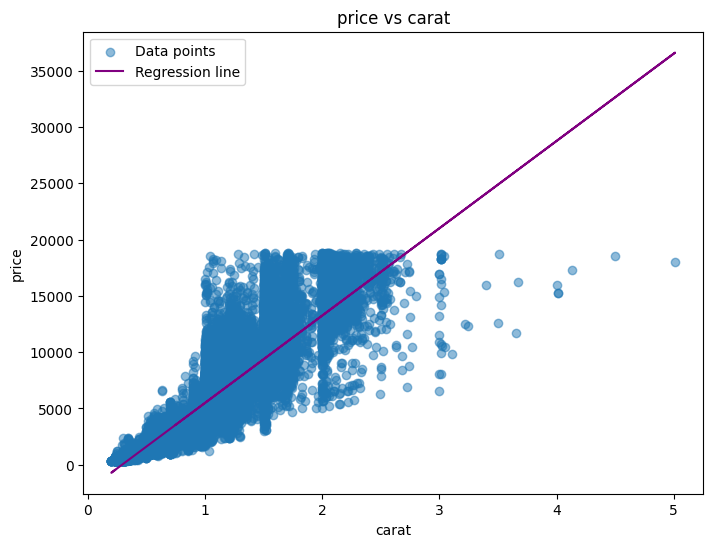

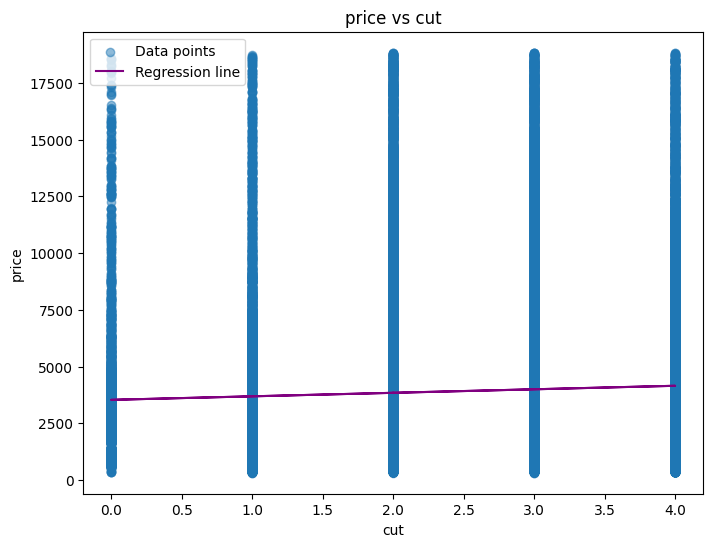

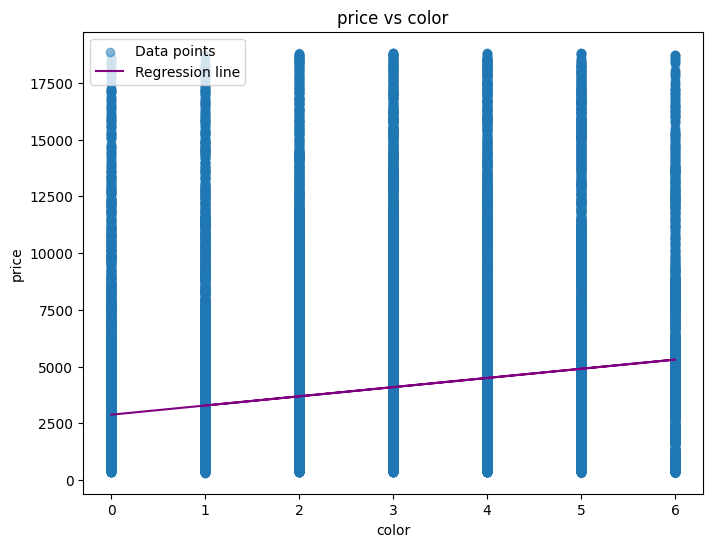

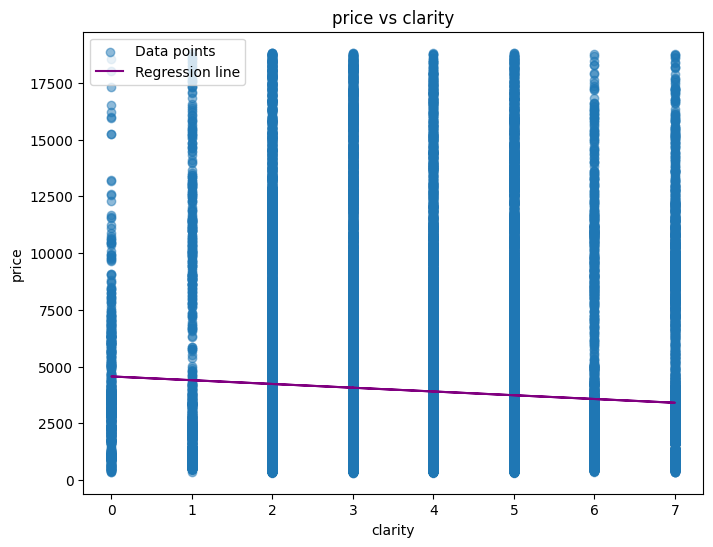

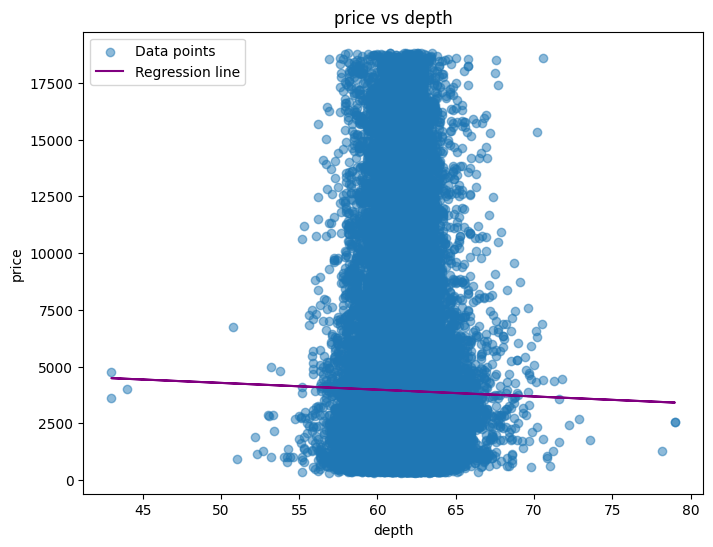

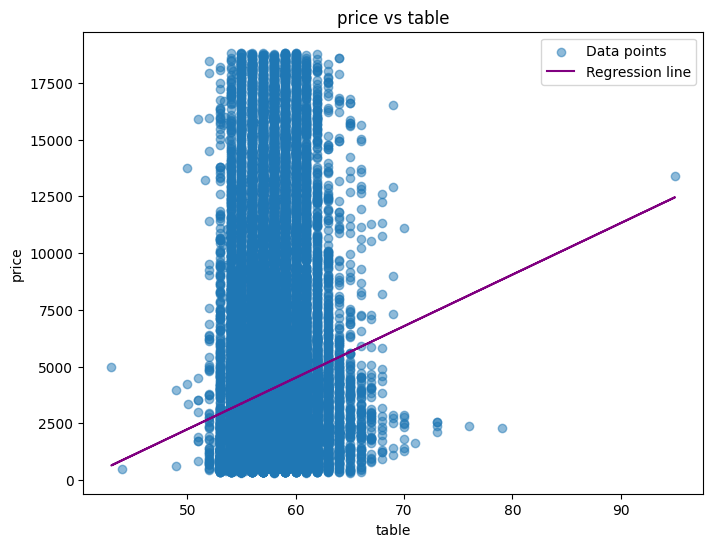

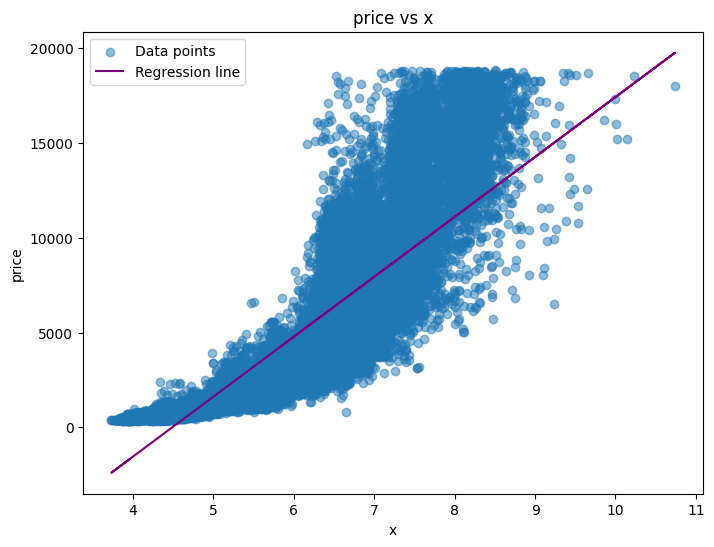

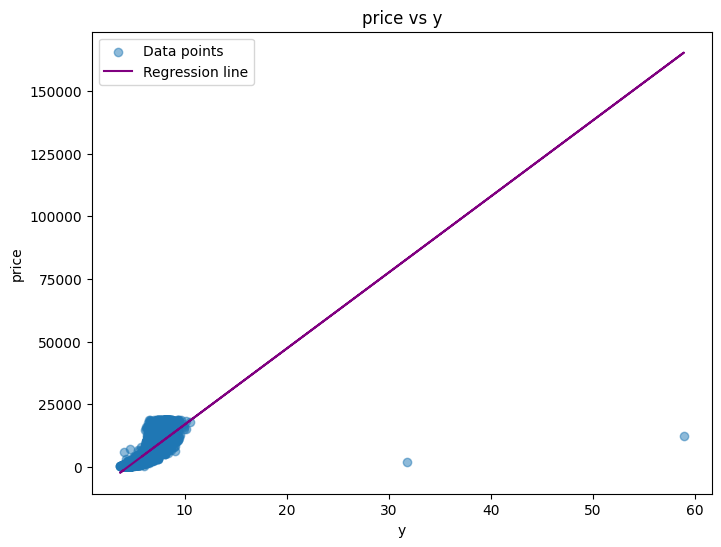

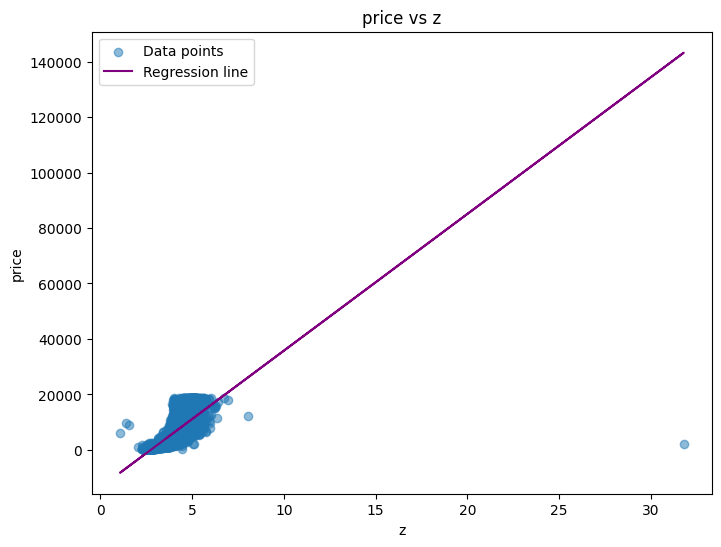

In [50]:
for response_var in response_variable:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[response_var], data[predictor_var], alpha=0.5, label='Data points')
    plt.title(f"{predictor_var} vs {response_var}")
    plt.xlabel(response_var)
    plt.ylabel(predictor_var)
    
    # Fit a linear regression line
    m, b = np.polyfit(data[response_var], data[predictor_var], 1)
    plt.plot(data[response_var], m * data[response_var] + b, color='purple', label='Regression line')
    
    plt.legend()
    plt.show()

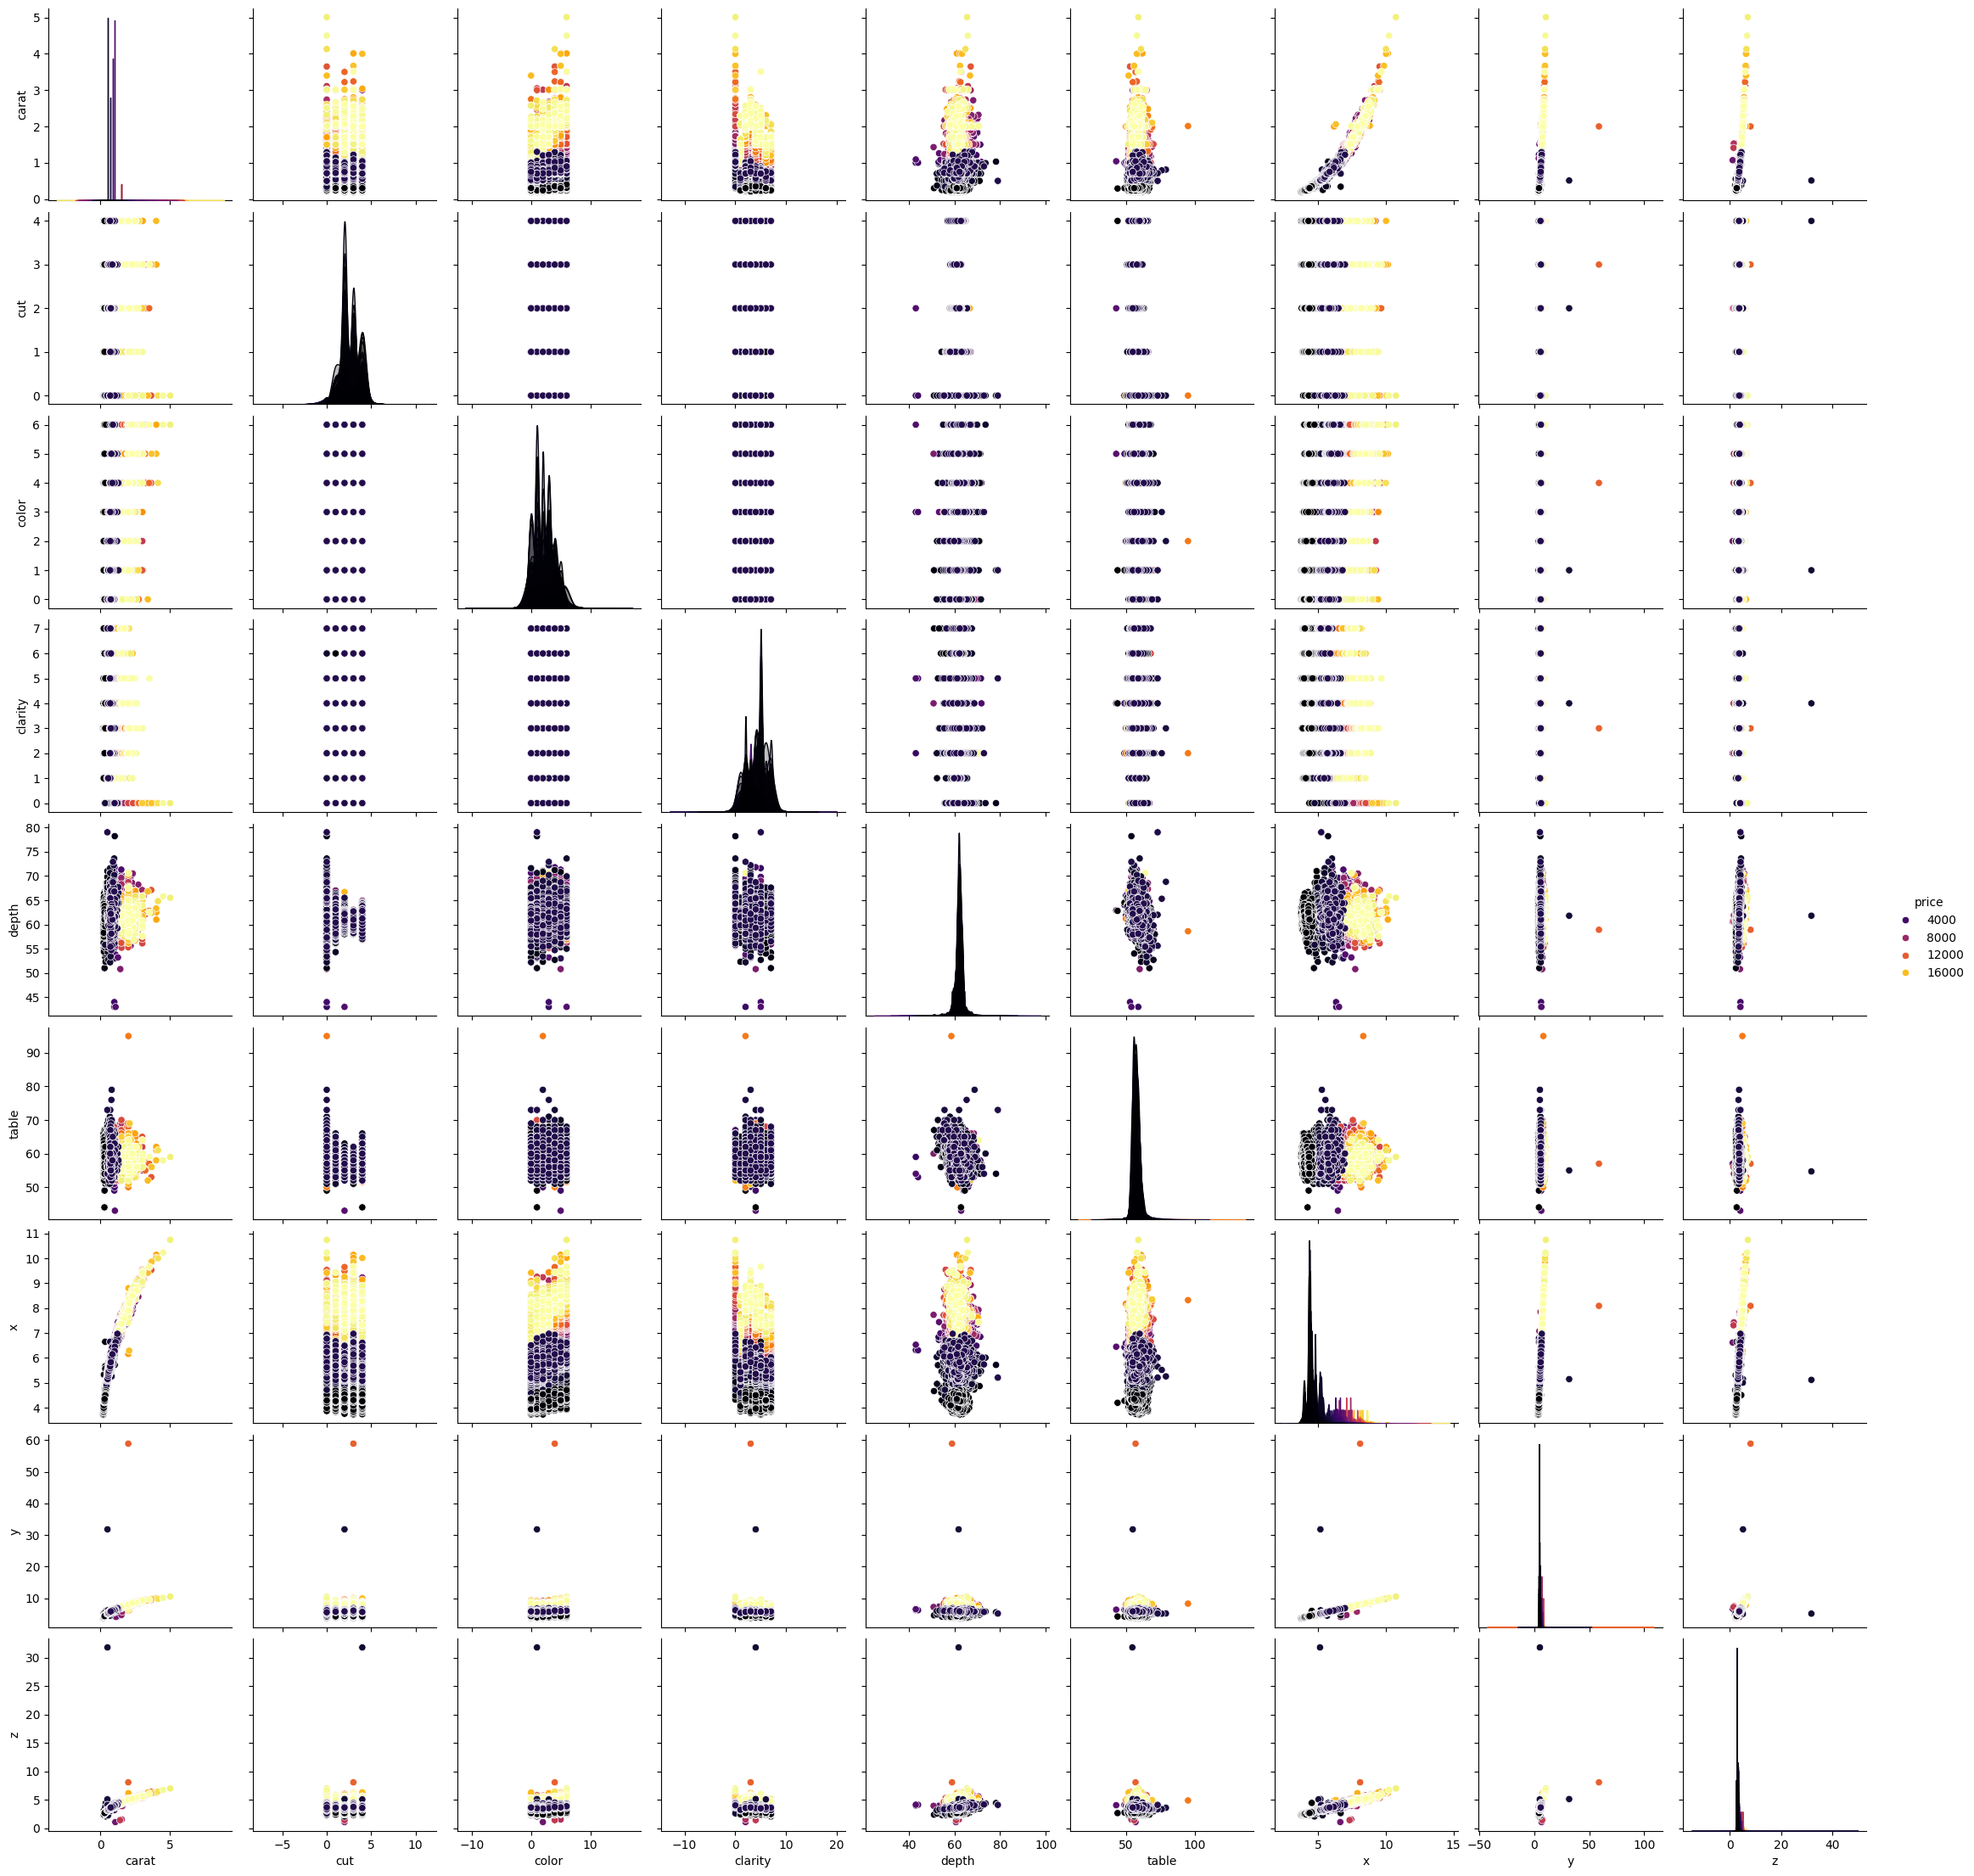

In [36]:
# Pairplot of the data
ax = sns.pairplot(data, hue='price', palette='inferno')

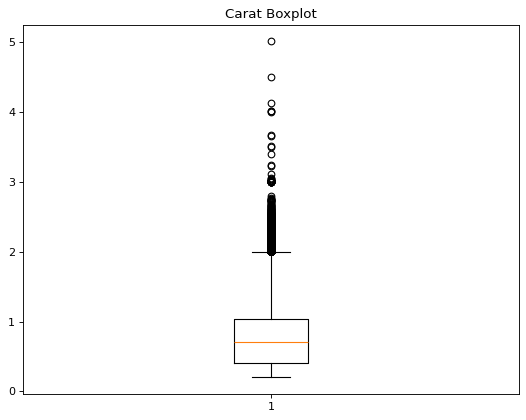

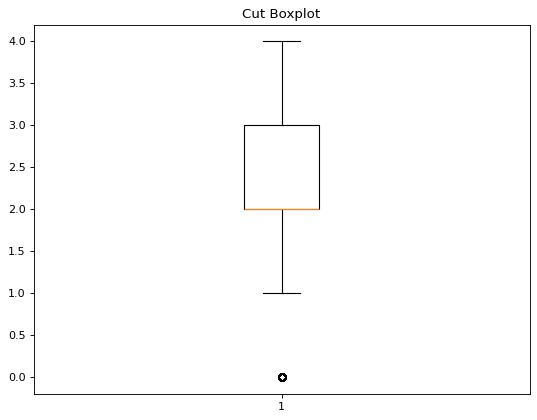

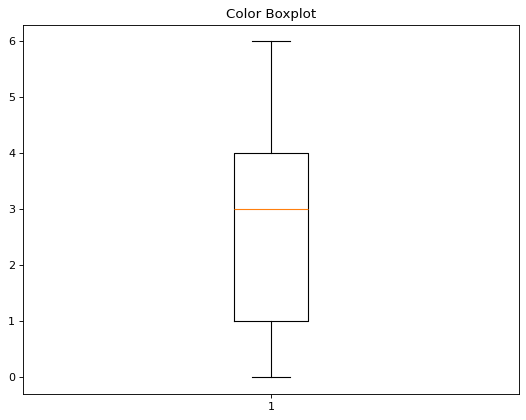

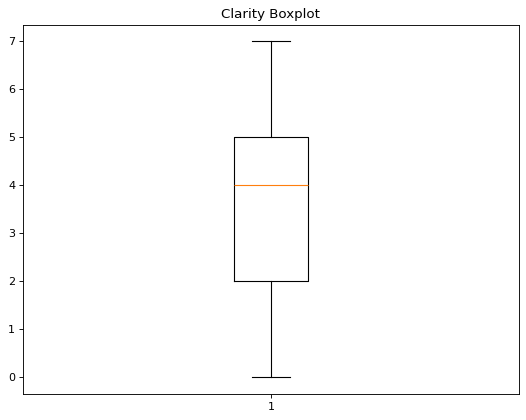

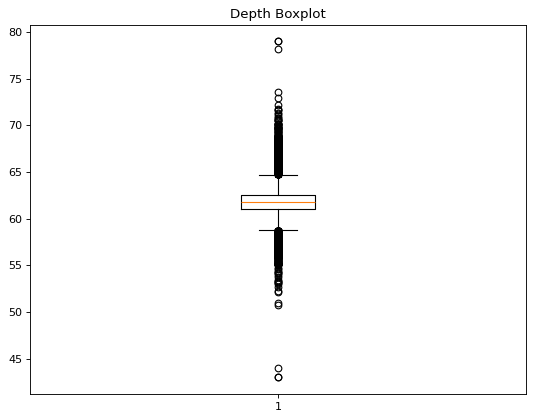

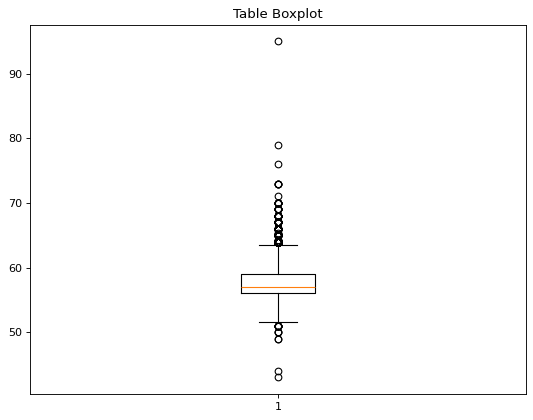

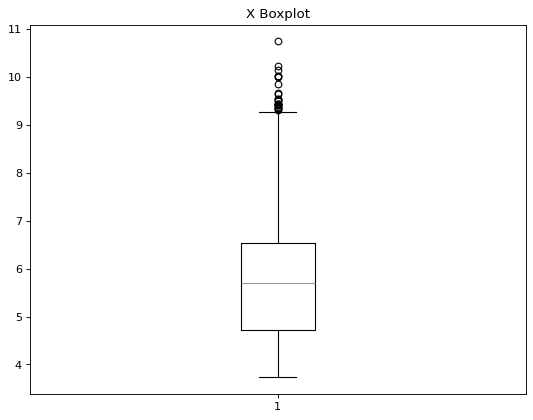

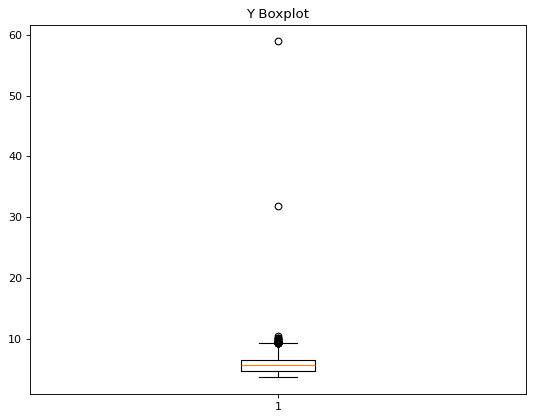

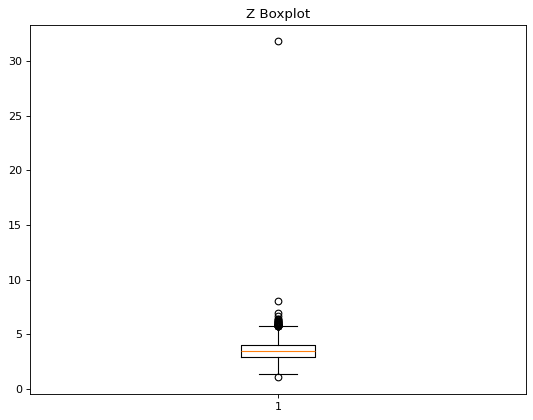

In [25]:
# Scatter plot between carat and price
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(data["carat"])
plt.title("Carat Boxplot")
plt.show()

# Scatter plot between cut and price
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(data["cut"])
plt.title("Cut Boxplot")
plt.show()

# Scatter plot between color and price
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(data["color"])
plt.title("Color Boxplot")
plt.show()

# Scatter plot between clarity and price
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(data["clarity"])
plt.title("Clarity Boxplot")
plt.show()

# Scatter plot between depth and price
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(data["depth"])
plt.title("Depth Boxplot")
plt.show()

# Scatter plot between table and price
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(data["table"])
plt.title("Table Boxplot")
plt.show()

# Scatter plot between x and price
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(data["x"])
plt.title("X Boxplot")
plt.show()

# Scatter plot between y and price
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(data["y"])
plt.title("Y Boxplot")
plt.show()

# Scatter plot between z and price
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(data["z"])
plt.title("Z Boxplot")
plt.show()

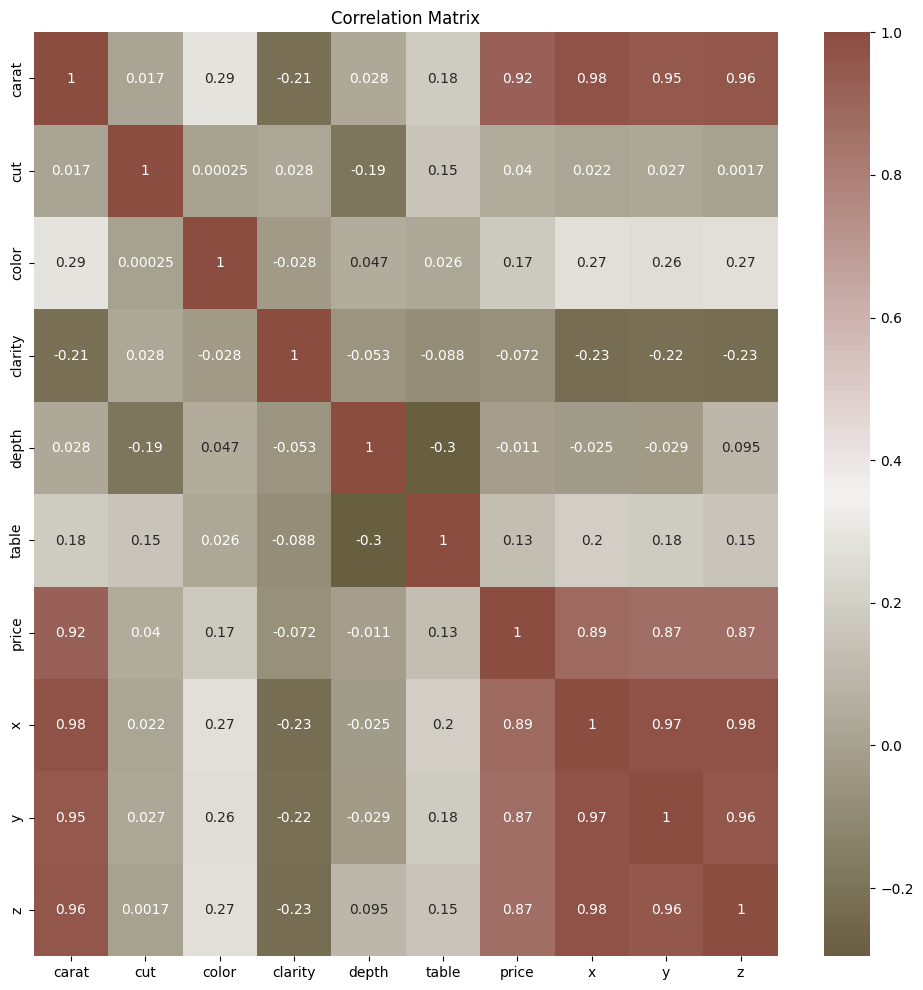

In [37]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Set the color palette
cmap = sns.diverging_palette(70, 20, s=50, l=40, n=6, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, cmap=cmap, annot=True)
plt.title("Correlation Matrix")
plt.show()
